In [209]:
from sklearn import metrics
import numpy as np
import sympy
from sympy.matrices import Matrix
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [210]:
y_true = np.round(np.random.sample(10))
y_pred = np.round(np.random.sample(10))
equals = 0
for true, pred in zip(y_true, y_pred):
  if true == pred: equals +=1
equals

5

In [211]:
# Alternative way of 0-1 sample generation
n, p = 1, .5  # number of trials, probability of each trial
s = np.random.binomial(n, p, size=10)
s

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

Try ours from the quiz
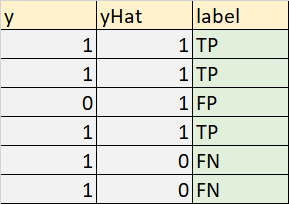

In [212]:
y_true = np.array([1, 1, 0, 1, 1, 1])
y_pred = np.array([1, 1, 1, 1, 0, 0])


In [213]:
df = pd.DataFrame(data={"y_true": y_true, "y_pred": y_pred})
df.transpose()

,0,1,2,3,4,5
y_true,1,1,0,1,1,1
y_pred,1,1,1,1,0,0


In [214]:
allCount = len(y_true)
oneCount = int(np.sum(y_true))
zeroCount = allCount - oneCount
allCount, oneCount, zeroCount

(6, 5, 1)

In [215]:
cm = metrics.confusion_matrix(y_true, y_pred)
cm

array([[0, 1],
       [2, 3]])

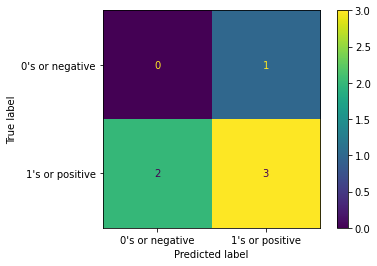

In [216]:
display = metrics.ConfusionMatrixDisplay(cm, ["0's or negative", "1's or positive"])
display.plot()
plt.show()

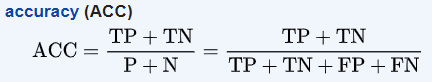

In [217]:
metrics.accuracy_score(y_true, y_pred)

0.5

## By hand, in Python terminology (non-statistical)
Basic cells of confusion matrix. 

In [218]:
(TN, FP), (FN, TP) = cm
print("TN =", TN)
print("FP =", FP)
print("FN =", FN)
print("TP =", TP)

TN = 0
FP = 1
FN = 2
TP = 3


Marginals

In [219]:
diagonal = TP +  TN
print("diagonal =", diagonal)
all = TP + TN + FP + FN
print("all =", all)
accByFormula = diagonal / all
print("accByFormula =", accByFormula)

diagonal = 3
all = 6
accByFormula = 0.5


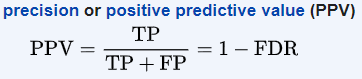

In [220]:
metrics.precision_score(y_true, y_pred)

0.75

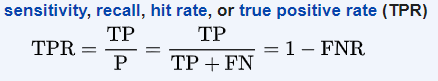

In [221]:
metrics.recall_score(y_true, y_pred)

0.6

In [222]:
%%script false
plt.plot(*metrics.precision_recall_curve(y_true, y_pred))
plt.show()

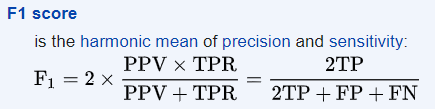

In [223]:
metrics.f1_score(y_true, y_pred)

0.6666666666666665

In [224]:
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      0.60      0.67         5

    accuracy                           0.50         6
   macro avg       0.38      0.30      0.33         6
weighted avg       0.62      0.50      0.56         6



------------------

In [225]:
y_true = np.array([1, 1, 0, 1, 1, 1])
y_pred = np.array([1, 1, 1, 1, 0, 0])

In [226]:
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.75      0.60      0.67         5

    accuracy                           0.50         6
   macro avg       0.38      0.30      0.33         6
weighted avg       0.62      0.50      0.56         6



--------------------------

In [227]:
y_true = np.array([1, 1, 0, 1, 1, 1])
y_pred = np.array([1, 0, 0, 1, 1, 1])

In [228]:
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.80      0.89         5

    accuracy                           0.83         6
   macro avg       0.75      0.90      0.78         6
weighted avg       0.92      0.83      0.85         6



#ROC

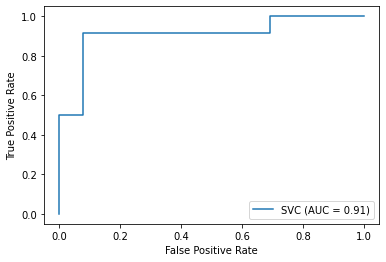

In [229]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm
X, y = datasets.make_classification(random_state=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
clf = svm.SVC(random_state=0)
clf.fit(X_train, y_train)

metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()  

In [230]:
import numpy as np
from sklearn import metrics
#y = np.array([1, 1, 2, 2])
y = np.array([0, 0, 1, 1])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=1)
fpr


array([0. , 0. , 0.5, 0.5, 1. ])

In [231]:
tpr

array([0. , 0.5, 0.5, 1. , 1. ])

In [232]:
thresholds

array([1.8 , 0.8 , 0.4 , 0.35, 0.1 ])

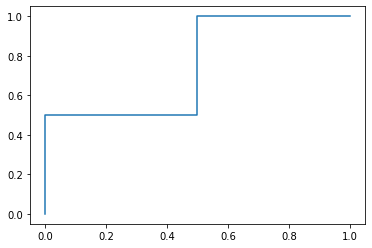

In [233]:
plt.plot(fpr, tpr)

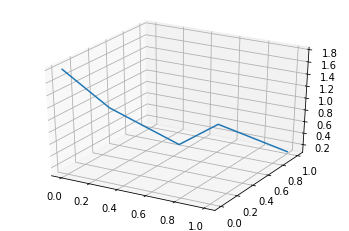

In [234]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot(fpr, tpr, thresholds)

In [235]:
from plotly import graph_objects as go

In [236]:
line = go.Scatter3d(x=fpr, y=tpr, z=thresholds, mode="lines")
fig = go.Figure(data=line)
fig.show()